In [100]:
# Lets start by importing everything we think we might need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Extract the csv and look at the first 5 entries
reviews = pd.read_csv("../amazon-fine-food-reviews/Reviews.csv")
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [102]:
# Check out descriptive statistics and general column info
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [103]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [104]:
reviews.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [105]:
reviews.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### First Look at Data:
1. ID: Every review has a unique ID, giving us a total count of **568,454** reviews. This is an int.
2. ProductID: There are **74,258** unique products. The productID is a string that includes capital letters and nums.
3. UserID: There are a total of * (5*256,059** user. This column is a string that includes capital letters and numbers.
4. ProfileName: There are **16** instances with **NaN** ProfileNames, leaving us with **218,416** unique profiles. This is a string that the user creates.
5. HelpfulnessNumerator: Int that represents how many people found the review helpful.
6. HelpfulnessDenominator: Int that represents how many people didn't find the review helpful.
7. Score: Review from 1-5 (1: Poor, 5: Excellent)
8. Summary: String that represents the subject line of their review. **27 null cells**.
9. Text: Contains full review text, although the display will show an "..." to represent that it doesn't show the entire text.

Now lets do some simply graphs and charts with the group by function

In [106]:
reviews.groupby(['ProductId', 'UserId']).head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [107]:
import datetime
reviews['Time'] = reviews['Time'].apply(datetime.datetime.fromtimestamp)

In [108]:
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-26 17:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-06 17:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-17 17:00:00,"""Delight"" says it all",This is a confection that has been around a fe...


In [109]:
# On first glance, it looks like the Time stamp varies between 5 pm and 4 pm. Let's visualize
reviews['Hour'] = reviews['Time'].apply(lambda x: x.hour)
reviews['Weekday'] = reviews['Time'].apply(lambda x: x.dayofweek)
reviews['Day'] = reviews['Time'].apply(lambda x: x.dayofyear)
reviews['Year'] = reviews['Time'].apply(lambda x: x.year)

(array([185934.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 382520.]),
 array([16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. ]),
 <a list of 10 Patch objects>)

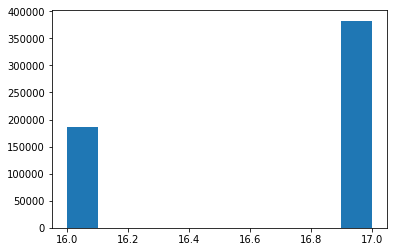

In [110]:
plt.hist(reviews['Hour'])

(array([3.8000e+01, 1.3000e+01, 7.3000e+01, 6.9300e+02, 1.3440e+03,
        6.6860e+03, 5.6502e+04, 5.5403e+04, 8.6092e+04, 3.6161e+05]),
 array([1999. , 2000.3, 2001.6, 2002.9, 2004.2, 2005.5, 2006.8, 2008.1,
        2009.4, 2010.7, 2012. ]),
 <a list of 10 Patch objects>)

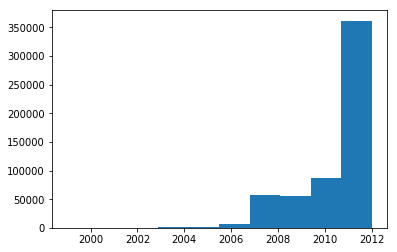

In [111]:
plt.hist(reviews['Year'])

In [112]:
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-26 17:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...,17,1,116,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-06 17:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,17,3,250,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-17 17:00:00,"""Delight"" says it all",This is a confection that has been around a fe...,17,6,230,2008


In [113]:
reviews.groupby('Hour').mean()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Weekday,Day,Year
Hour,,,,,,,
16,284114.073784,2.023546,2.569035,4.175638,2.932100,154.615563,2010.335463
17,284282.633823,1.607848,2.063435,4.186874,2.919868,194.052094,2010.699814


('There are', 185934, 'entries submitted at 4 pm, and', 382520, 'entries submitted at 5 pm.')


(array([1.60000e+01, 1.10000e+01, 1.90000e+01, 3.74000e+02, 7.74000e+02,
        3.67200e+03, 3.43250e+04, 3.55260e+04, 5.34210e+04, 2.54382e+05]),
 array([1999. , 2000.3, 2001.6, 2002.9, 2004.2, 2005.5, 2006.8, 2008.1,
        2009.4, 2010.7, 2012. ]),
 <a list of 10 Patch objects>)

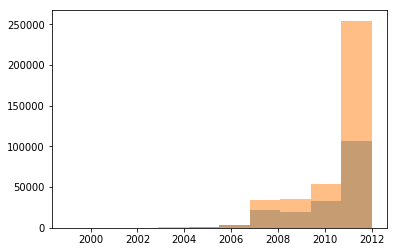

In [114]:
hour16 = reviews[reviews.Hour == 16]
hour17 = reviews[reviews.Hour == 17]
print("There are",hour16.shape[0],"entries submitted at 4 pm, and", hour17.shape[0], "entries submitted at 5 pm.")
plt.hist(hour16.Year,alpha = 0.5)
plt.hist(hour17.Year, alpha = 0.5)

(array([32398., 35691., 36064., 36609., 35963., 38045., 40334., 44142.,
        44595., 38679.]),
 array([ 67. ,  91.3, 115.6, 139.9, 164.2, 188.5, 212.8, 237.1, 261.4,
        285.7, 310. ]),
 <a list of 10 Patch objects>)

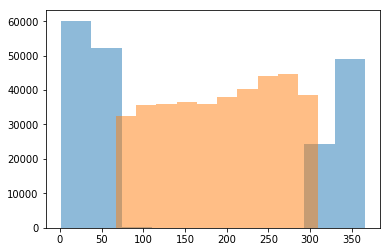

In [115]:
plt.hist(hour16.Day,alpha = 0.5)
plt.hist(hour17.Day, alpha = 0.5)

Above shows the relationship between 4 pm and 5 pm dont seem to be related to other time factors

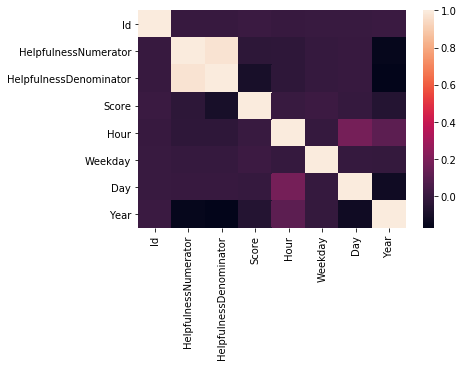

In [116]:
%matplotlib inline

# calculate the correlation matrix
corr = reviews.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126c7d310>]],
      dtype=object)

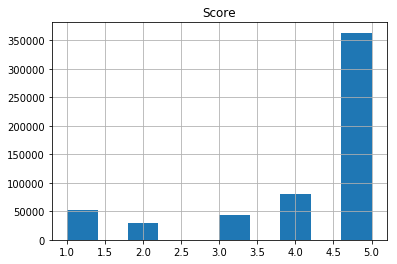

In [117]:
reviews.hist('Score')

Now lets look more into the products and users themselves.

In [118]:
reviews.groupby('UserId').Score.agg(['mean','count'])

,mean,count
UserId,,
#oc-R103C0QSV1DF5E,5.000000,1
#oc-R109MU5OBBZ59U,5.000000,1
#oc-R10LFEMQEW6QGZ,5.000000,1
#oc-R10LT57ZGIB140,3.000000,1
#oc-R10UA029WVWIUI,1.000000,1
#oc-R115TNMSPFT9I7,2.000000,2
#oc-R119LM8D59ZW8Y,1.000000,1
#oc-R11D9D7SHXIJB9,5.000000,3
#oc-R11D9LKDAN5NQJ,3.000000,1


Check for duplicates


In [119]:
reviews.shape

(568454, 14)

In [120]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 14 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null datetime64[ns]
Summary                   568427 non-null object
Text                      568454 non-null object
Hour                      568454 non-null int64
Weekday                   568454 non-null int64
Day                       568454 non-null int64
Year                      568454 non-null int64
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 60.7+ MB


In [121]:

4
# Select all duplicate rows based on one column
entriesWithDuplicates = reviews[reviews.duplicated(['UserId','ProductId','Score','Text'],keep = False)]
print(entriesWithDuplicates.shape)
entriesWithDuplicates.head(3)

(2082, 14)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2008-12-15 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,0,350,2008


In [122]:
reviews[reviews['UserId'] == 'A3PJZ8TU8FDQ1K']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
467,468,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...,16,6,11,2009
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
602,603,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2009-03-14 17:00:00,"One bite and you'll become a ""chippoisseur""","As an Oregonian, I make a point of sharing the...",17,5,73,2009
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2008-12-15 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,0,350,2008
6797,6798,B001LG945O,A3PJZ8TU8FDQ1K,Jared Castle,0,0,4,2009-02-25 16:00:00,Tasty refuel after exercise or liven up a lunc...,As part of Amazon's Vine Program I received tw...,16,2,56,2009
7988,7989,B004WM0ZTS,A3PJZ8TU8FDQ1K,Jared Castle,0,1,4,2010-11-05 17:00:00,"In a pinch, Via is a portable and affordable c...","Behind the 12 packets of Via instant coffee, S...",17,4,309,2010
13972,13973,B00434KRHU,A3PJZ8TU8FDQ1K,Jared Castle,2,2,4,2011-09-24 17:00:00,"You get convenience and value, feed two boys f...",Hamburger Helper is a quick fix dinner for our...,17,5,267,2011
15764,15765,B007TJGZ5E,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2011-07-18 17:00:00,Delicious medium-roast blend with complex tones,"<span class=""tiny""> Length:: 1:30 Mins<br /><b...",17,0,199,2011
15828,15829,B007TJGZ5E,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2011-07-18 17:00:00,Delicious medium-roast blend with complex tones,"<span class=""tiny""> Length:: 1:30 Mins<br /><b...",17,0,199,2011


In [123]:
entriesWithDuplicates.groupby(['UserId','ProductId','Text']).agg({'HelpfulnessNumerator': 'mean','HelpfulnessDenominator':'mean', 
                                                     'Score': 'mean', 'Text':'count'})

HelpfulnessNumerator  \
UserId         ProductId  Text                                                                       
A10GBEDF4RCOVI B0037272UY My girlfriend and I have been rescuing, fosteri...             13.000000   
A10H24TDLK2VDP B003TC7WN4 First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B003VXFK44 First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B003VXHGDM First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B003VXHGE6 First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B003VXHGPK First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B003VXL0V6 First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B004FGWU9O First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B006N3IE6A First, let me say that I prefer extra-bold K-Cu...              0.666667   
               B006N3IG4K First, let me say that I prefer extra-bold K-Cu...              0.666667   
A10NJPL8SA82WC B0026RQTGE These things are awesome.  These Greenies reall...              0.000000   
               B002QWHJOU These things are awesome.  These Greenies reall...              0.000000   
               B002QWP89S These things are awesome.  These Greenies reall...              0.000000   
               B002QWP8H0 These things are awesome.  These Greenies reall...              0.000000   
A10RYZVFVJQ9EZ B0031U9UZC Can't say enough about these products...Amazing...              0.500000   
               B0031U9VI8 Can't say enough about these products...Amazing...              0.500000   
               B0031UBWLM Can't say enough about these products...Amazing...              0.500000   
               B0031UBXDE Can't say enough about these products...Amazing...              0.500000   
A11ATMWV9U51YF B001P05K6I Please be careful with this product. My pug alm...              7.500000   
A14OWDYHPAXSLZ B0029NGX34 it is really good or really bad<br />so overall...              1.000000   
               B0029NGY4M it is really good or really bad<br />so overall...              1.000000   
               B0029NIFXK it is really good or really bad<br />so overall...              1.000000   
               B0029NIGMA it is really good or really bad<br />so overall...              1.000000   
               B0029NII3C it is really good or really bad<br />so overall...              1.000000   
               B0029NIIKK it is really good or really bad<br />so overall...              1.000000   
               B0029NLV8G it is really good or really bad<br />so overall...              1.000000   
A17V9XL4CWTQ6G B0006U7T1C I have studied canine nutrition for the last 5 ...             12.500000   
A187LYIJPWJYSA B0036FBZG4 I loved the flavor of the vanilla shakes until ...              1.500000   
A18TOZ8633JCXK B002R8J7YS We have a Newfoundland that we like to pamper. ...              1.000000   
               B002R8SLUY We have a Newfoundland that we like to pamper. ...              1.000000   
...                                                                                            ...   
AV0HWIE7H9GWQ  B0030VBQOK I have a one and two year old who just love the...              0.000000   
               B0030VBRCG I have a one and two year old who just love the...              0.000000   
               B0030VJ818 I have a one and two year old who just love the...              0.000000   
               B0030VJ8E0 I have a one and two year old who just love the...              0.000000   
               B0030VJ8PE I have a one and two year old who just love the...              0.000000   
AVCN8RNU02QKN  B0007LXU9A These are great!  Low calorie, light, crispy, g...              1.500000   
               B000EHIVIW These are great!  Low calorie, light, crispy, g...              1.500000  

What should we do with duplicates?

In [124]:
reviews[reviews.HelpfulnessNumerator > 100].head(5).Text

1702    I was on the fence about buying these for mont...
3305    I HATE SUCRALOSE.<br /><br />Honestly, I don't...
4251    I usually make my own gluten free stuff from s...
4252    Our family has been wheat-free for 3 years and...
9904    I bought the Navitas Naturals Chia seeds.  The...
Name: Text, dtype: object

# Week 2!

## 1. Duplicate Reviews:
    - Get rid of duplicates (which are defined as entries with the same user id, product id, summary, and text) 
    - To aggregate we will take the mean of helpfulness numerator, denominator, and the score.
    

In [125]:
columns = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Count'] # Where Count is the number of duplciates
for i in columns:
    print(i)
    if(i == 'Count'):
        reviews[i] = reviews.groupby(['UserId','ProductId','Summary','Text'])['Score'].transform('count')
    else:
        reviews[i] = reviews.groupby(['UserId','ProductId','Summary','Text'])[i].transform('mean')

# Now, remove duplicates, and keep first entry
reviews.drop_duplicates(subset = ['UserId', 'ProductId', 'Summary', 'Text'], 
                     keep = 'first', inplace = True) 
reviews.shape

HelpfulnessNumerator
HelpfulnessDenominator
Score
Count


In [129]:
reviews[reviews.Count > 1]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year,Count
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1.000000,1.000000,5.0,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009,3.0
2941,2942,B0002TJAZK,A3TVZM3ZIXG8YW,christopher hayes,3.500000,6.500000,1.0,2010-12-03 16:00:00,"Filler food is empty, leaves your cat always n...","This review will make me sound really stupid, ...",16,4,337,2010,2.0
2943,2944,B0002TJAZK,A2ISKAWUPGGOLZ,M. S. Handley,1.000000,2.500000,1.0,2011-07-15 17:00:00,Kitty Junk Food,We have five cats - one an elderly cat of 15 y...,17,4,196,2011,2.0
5934,5935,B001O2IX8E,A3KDZCQ82JFWLN,Phoebe Oh,1.000000,1.500000,1.0,2009-06-24 17:00:00,Some broken jars,When I saw some of the Earth's Best jars offer...,17,2,175,2009,2.0
6516,6517,B005O8BLLU,APH7I7OZ8WUJP,J. Simpson,0.000000,0.000000,5.0,2012-09-12 17:00:00,Great first food,This is excellent for a baby's first taste. Th...,17,2,256,2012,2.0
8522,8523,B003VXFK44,A10H24TDLK2VDP,William Jens Jensen,0.666667,0.666667,3.0,2011-07-04 17:00:00,Unremarkable,"First, let me say that I prefer extra-bold K-C...",17,0,185,2011,3.0
9231,9232,B006N3IG4K,A10H24TDLK2VDP,William Jens Jensen,0.666667,0.666667,3.0,2011-07-04 17:00:00,Unremarkable,"First, let me say that I prefer extra-bold K-C...",17,0,185,2011,3.0
10250,10251,B003EML8PM,A317OK989S2YFO,"Keith Slayton ""Slaydog""",0.500000,0.500000,5.0,2009-05-31 17:00:00,Tasty,We originally found these at Wally World. Whe...,17,6,151,2009,2.0
10836,10837,B0034KP00S,A1TMAVN4CEM8U8,Gunner,0.333333,0.333333,5.0,2012-03-08 16:00:00,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...,16,3,68,2012,3.0
11237,11238,B001KVPC0G,A1TMAVN4CEM8U8,Gunner,0.000000,1.000000,5.0,2012-03-20 17:00:00,I prefer the flavored,Diamond Almonds<br />Almonds are a good source...,17,1,80,2012,2.0


## 2. Let's focus on Product ID now:
    - Look at most popular items (based on number of reviews), how does the distribution look like for reviews?
   

In [231]:
productReviewCount = reviews.groupby('ProductId').agg({'Count':'count'}).reset_index()
productReviewCount.shape

(74258, 2)

In [234]:
top10 = productReviewCount.sort_values('Count', ascending=False).head(10).ProductId.tolist()
top10

['B007JFMH8M',
 'B0026RQTGE',
 'B002QWHJOU',
 'B002QWP8H0',
 'B002QWP89S',
 'B003B3OOPA',
 'B001EO5Q64',
 'B0026KNQSA',
 'B0013NUGDE',
 'B007M83302']

In [227]:
def frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies
def probabilities(sample, freqs):
    probs = []
    for k,v in freqs.items():
        size = len(sample)
        probs.append(float(v)/size)
    return probs

5.0    624
4.0    217
3.0     56
2.0     12
1.0      4
Name: Score, dtype: int64


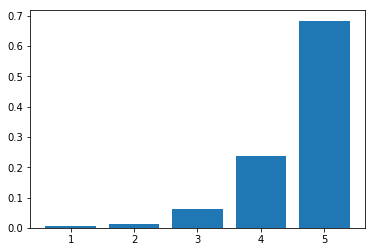

5.0    497
4.0     74
1.0     27
3.0     21
2.0     12
Name: Score, dtype: int64


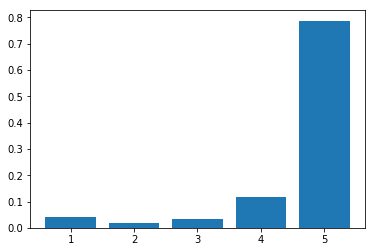

5.0    497
4.0     74
1.0     27
3.0     21
2.0     12
Name: Score, dtype: int64


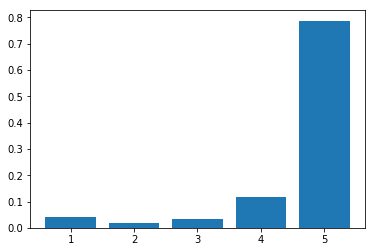

5.0    497
4.0     74
1.0     27
3.0     21
2.0     12
Name: Score, dtype: int64


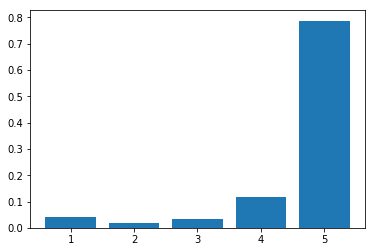

5.0    497
4.0     74
1.0     27
3.0     21
2.0     12
Name: Score, dtype: int64


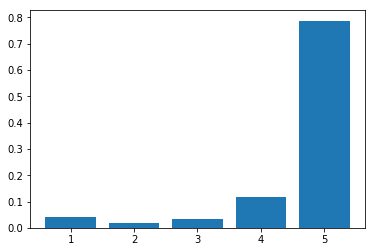

5.0    517
4.0     68
3.0     25
2.0      8
1.0      5
Name: Score, dtype: int64


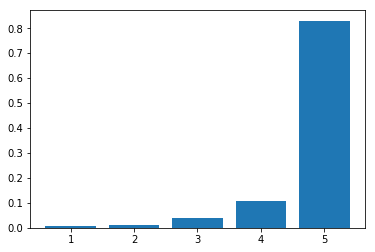

5.0    474
4.0     65
3.0     15
1.0     10
2.0      3
Name: Score, dtype: int64


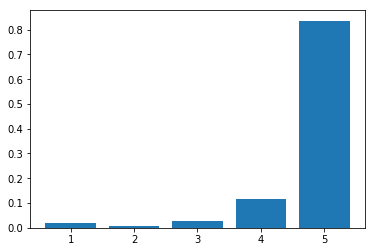

5.0    369
4.0     90
3.0     46
1.0     30
2.0     29
Name: Score, dtype: int64


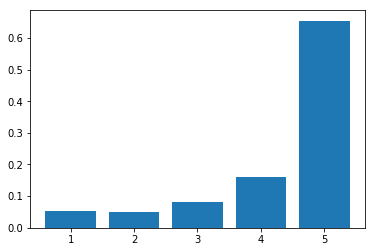

5.0    369
4.0     90
3.0     46
1.0     30
2.0     29
Name: Score, dtype: int64


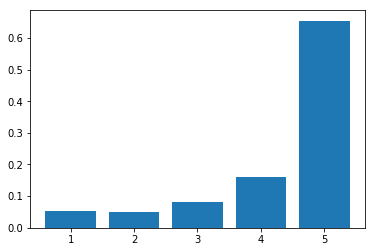

5.0    369
4.0     90
3.0     46
1.0     30
2.0     29
Name: Score, dtype: int64


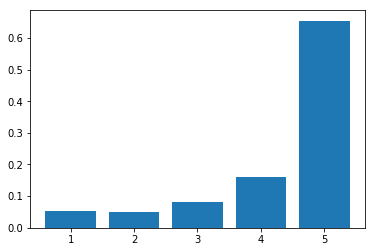

In [245]:
for i in top10:
    x = reviews[reviews['ProductId'] == i].Score
    print(x.value_counts())
    freqs = frequencies(x)
    probs = probabilities(x, freqs)
    x_axis = list(set(x))
    
    plt.bar(x_axis, probs)
    plt.show()

In [241]:
reviews[(reviews['ProductId'] == top10[1]) | (reviews['ProductId'] == top10[3])]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year,Count
74631,74632,B0026RQTGE,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1.0,1.0,5.0,2011-10-17 17:00:00,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,17,0,290,2011,1.0
74632,74633,B0026RQTGE,A17TDUBB4Z1PEC,jaded_green,1.0,1.0,5.0,2011-10-13 17:00:00,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",17,3,286,2011,1.0
74633,74634,B0026RQTGE,ABQH3WAWMSMBH,tenisbrat87,1.0,1.0,5.0,2011-09-27 17:00:00,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",17,1,270,2011,1.0
74634,74635,B0026RQTGE,AVTY5M74VA1BJ,tarotqueen,1.0,1.0,5.0,2011-09-23 17:00:00,dogs love greenies,"What can I say, dogs love greenies. They begg ...",17,4,266,2011,1.0
74635,74636,B0026RQTGE,A13TNN54ZEAUB1,dcz2221,1.0,1.0,5.0,2011-09-22 17:00:00,Greenies review,This review is for a box of Greenies Lite for ...,17,3,265,2011,1.0
74636,74637,B0026RQTGE,A1AO8A38JUDVAF,chrisdd,1.0,1.0,5.0,2011-09-04 17:00:00,Magic Breath Chews for your dog,I highly recommend these chews for your dog. T...,17,6,247,2011,1.0
74637,74638,B0026RQTGE,AH261OMJCV5U8,"Chelle ""Wichita, Kansas""",1.0,1.0,5.0,2011-08-25 17:00:00,Greenies for Seniors,I have always used Greenies for my dogs. THese...,17,3,237,2011,1.0
74638,74639,B0026RQTGE,A3VVIU4JE56U4K,P. Chevalier,1.0,1.0,5.0,2011-08-25 17:00:00,Kinda Pricy but good!,If you've got hard chewers (like one of our do...,17,3,237,2011,1.0
74639,74640,B0026RQTGE,A3MWZ2E112KIY4,J. Nakawatase,1.0,1.0,5.0,2011-08-20 17:00:00,DOG LOVES THESE,I tried Greenies on my dog about 8 years ago a...,17,5,232,2011,1.0
74640,74641,B0026RQTGE,A2PRQXWZRHTKE3,Maria Karlsson,1.0,1.0,5.0,2011-08-12 17:00:00,Great treat and good for dental health,This is a fabulous treat for my little cavalie...,17,4,224,2011,1.0


#### Upon Inspection, it looks like there are multiple products that have different product ID's, however, correlate with the same item
- Let's say, if an item has the exact same distribution of reviews and the exact same number of reviews, then it is most likely a duplicate?
- Do we care? If we ran our model, it may be able to find discrepancies between the similar product ids. We need to make sure that these reviews aren't identical for the productIds

In [254]:
reviews['PotentialDupe'] = 0

In [272]:
# Get one hot encoding of Score column
one_hot = pd.get_dummies(reviews['Score'])
# Will need to drop Score column in the future
# Join the encoded df
new_reviews = reviews.join(one_hot)
new_cum_reviews = new_reviews.groupby('ProductId').agg({'Count':'count',1.0:'sum',2.0:'sum',3.0:'sum',4.0:'sum',4.5:'sum',5.0:'sum'})

In [280]:
# new_cum_reviews = new_reviews.groupby('ProductId').agg({'Count':'count', '1.0':'sum', '2.0':'sum', '3.0':'sum', '4.0':'sum', '5.0':'sum'}).reset_index()
new_cum_reviews[new_cum_reviews[4.5] > 0]

,Count,1.0,2.0,3.0,4.0,5.0,4.5
ProductId,,,,,,,
B001BCVY4W,234,5,7,37,59,125.0,1
B001BCVY9W,234,5,7,37,59,125.0,1
B001BCXTGS,234,5,7,37,59,125.0,1
B001BDDT8K,234,5,7,37,59,125.0,1
B001BDDTB2,234,5,7,37,59,125.0,1
B0049PP5V6,3,0,1,0,1,0.0,1


# TO DO: MAKE SURE TO ROUND THE MEAN REVIEWS OF MULTIPLE REVIEWS

In [266]:
new_reviews.columns

Index([                    u'Id',              u'ProductId',
                       u'UserId',            u'ProfileName',
         u'HelpfulnessNumerator', u'HelpfulnessDenominator',
                        u'Score',                   u'Time',
                      u'Summary',                   u'Text',
                         u'Hour',                u'Weekday',
                          u'Day',                   u'Year',
                        u'Count',          u'PotentialDupe',
                             1.0,                       2.0,
                             3.0,                       4.0,
                             4.5,                       5.0],
      dtype='object')

In [281]:
potential_dupes = ['B001BCVY4W', 'B001BCVY9W', 'B001BCXTGS', 'B001BDDT8K', 'B001BDDTB2']


In [282]:
for i in potential_dupes:
    x = reviews[reviews['ProductId'] == i].Score
    print(i)
    print(x.value_counts())

B001BCVY4W
5.0    125
4.0     59
3.0     37
2.0      7
1.0      5
4.5      1
Name: Score, dtype: int64
B001BCVY9W
5.0    125
4.0     59
3.0     37
2.0      7
1.0      5
4.5      1
Name: Score, dtype: int64
B001BCXTGS
5.0    125
4.0     59
3.0     37
2.0      7
1.0      5
4.5      1
Name: Score, dtype: int64
B001BDDT8K
5.0    125
4.0     59
3.0     37
2.0      7
1.0      5
4.5      1
Name: Score, dtype: int64
B001BDDTB2
5.0    125
4.0     59
3.0     37
2.0      7
1.0      5
4.5      1
Name: Score, dtype: int64


In [301]:
#Let's look at the 4.5 review and the 1 star review:
for i in potential_dupes:
    x = reviews[(reviews['ProductId'] == i) & (reviews['Score'] == 4.5)]
    print(i)
    print("UserId:",x.UserId, "Text:", x.Text, "Summary:", x.Summary)

B001BCVY4W
('UserId:', 184479    A2FRFAQCWZJT3Q
Name: UserId, dtype: object, 'Text:', 184479    This is an edit so I was unable to change my s...
Name: Text, dtype: object, 'Summary:', 184479    Got Diarrhea?
Name: Summary, dtype: object)
B001BCVY9W
('UserId:', 116866    A2FRFAQCWZJT3Q
Name: UserId, dtype: object, 'Text:', 116866    This is an edit so I was unable to change my s...
Name: Text, dtype: object, 'Summary:', 116866    Got Diarrhea?
Name: Summary, dtype: object)
B001BCXTGS
('UserId:', 139620    A2FRFAQCWZJT3Q
Name: UserId, dtype: object, 'Text:', 139620    This is an edit so I was unable to change my s...
Name: Text, dtype: object, 'Summary:', 139620    Got Diarrhea?
Name: Summary, dtype: object)
B001BDDT8K
('UserId:', 539231    A2FRFAQCWZJT3Q
Name: UserId, dtype: object, 'Text:', 539231    This is an edit so I was unable to change my s...
Name: Text, dtype: object, 'Summary:', 539231    Got Diarrhea?
Name: Summary, dtype: object)
B001BDDTB2
('UserId:', 20288    A2FRFAQCWZJT

As we can see from the above output, which is very messy.... The 4.5 reviews are the exact same for each of the 5 different products. 

In [290]:
duplicateProducts = new_reviews[new_reviews.duplicated(['UserId','Summary','Score','Text'],keep = False)]

In [291]:
duplicateProducts.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,...,Day,Year,Count,PotentialDupe,1.0,2.0,3.0,4.0,4.5,5.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,2011-06-12 17:00:00,Cough Medicine,If you are looking for the secret ingredient i...,...,163,2011,1.0,0,0,1,0,0,0,0
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5.0,2005-02-07 16:00:00,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,...,38,2005,1.0,0,0,0,0,0,0,1
29,30,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,1.0,1.0,5.0,2005-02-07 16:00:00,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,...,38,2005,1.0,0,0,0,0,0,0,1
68,69,B000E7VI7S,A1KL2LAW08X6UQ,calmnsense,0.0,0.0,3.0,2007-01-19 16:00:00,How much would you pay for a bag of chocolate ...,"If you're impulsive like me, then $6 is ok. Do...",...,19,2007,1.0,0,0,0,1,0,0,0
69,70,B000E7VI7S,AWCBF2ZWIN57F,C. Salcido,0.0,2.0,5.0,2007-07-29 17:00:00,pretzel haven!,this was sooooo deliscious but too bad i ate e...,...,210,2007,1.0,0,0,0,0,0,0,1


In [293]:
productsWithDuplicates = duplicateProducts.groupby(['UserId','Summary','Score','Text']).agg({'HelpfulnessNumerator': 'mean','HelpfulnessDenominator':'mean', 
                                                     'Score': 'mean', 'Count':'count'})

In [297]:
productsWithDuplicates.describe()

,HelpfulnessNumerator,Count,Score,HelpfulnessDenominator
count,57366.000000,57366.000000,57366.000000,57366.000000
mean,1.735291,4.007409,4.171504,2.224695
std,8.611640,2.791527,1.316126,9.320659
min,0.000000,2.000000,1.000000,0.000000
25%,0.000000,2.000000,4.000000,0.000000
50%,0.000000,3.000000,5.000000,0.500000
75%,1.000000,5.000000,5.000000,2.000000
max,559.000000,38.000000,5.000000,562.000000


- As the above states, after removing some duplicate reviews, we see that we still have even more (57,000) duplicate product reviews by the same user, with the same score, the same summary, and the same text.
- Why is this an issue?
    - If we want a model to best predict score, it will need to take consideration the productId. If multiple productIds consist of the same reviews, then the model will decrease the weight the productId has on our prediction.
    - However, if we want to simply look at sentiment analysis, then we can essentially only focus on the review Text/Summary and the Score.

### For now, let's change gears and try to use a word cloud to visualize the texts that are most helpful, and least helpful
    - Most helpful can be defined by the highest helpfulness numerator
    - Least helpful can be defined as the highest difference between denominator and numerator

#### Steps:
    1. Find the most helpful review
    2. Find the least helpful review

In [327]:
# Most helpful review search. Using original df as this is purely visual
mostHelpful = reviews.sort_values('HelpfulnessNumerator', ascending=False).head(1)
mostHelpful
# Most helpful review is by User: A1GQGYROVZVW49 for Product: B000FI4O90 with HelpfulnessNumerator: 866.0

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year,Count,PotentialDupe,HelpfulDiff
190733,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866.0,878.0,5.0,2006-11-27 16:00:00,Works as Advertised - Classy Product,see update at end of review<br /><br />*******...,16,0,331,2006,1.0,0,12.0


In [310]:
reviews.iloc[190405]

Id                                                                   190733
ProductId                                                        B000FI4O90
UserId                                                       A2U8DCJADJEIXR
ProfileName                                                 R. Buck "rbuck"
HelpfulnessNumerator                                                      8
HelpfulnessDenominator                                                   31
Score                                                                     1
Time                                                    2008-12-11 16:00:00
Summary                                                Electricity drainer.
Text                      Got this for Christmas last year.  It drains e...
Hour                                                                     16
Weekday                                                                   3
Day                                                                     346
Year        

In [311]:
reviews['HelpfulDiff'] = reviews['HelpfulnessDenominator'] - reviews['HelpfulnessNumerator']

In [315]:
leastHelpful = reviews.sort_values('HelpfulDiff', ascending=False).head(1)
leastHelpful
# Least helpful review is by User: A1H6VW0W3UIK0K for Product: B001LUM1ZU with HelpfulDiff: 140.0

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year,Count,PotentialDupe,HelpfulDiff
470626,470627,B001LUM1ZU,A1H6VW0W3UIK0K,"Tyler Durden ""The first rule of amazon.com is...",5.0,145.0,1.0,2009-05-28 17:00:00,Should be illegal...,As if mayonnaise wasn't unhealthy enough for y...,17,3,148,2009,1.0,0,140.0


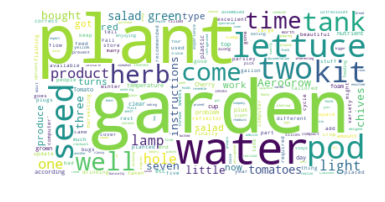

In [377]:
#WORD CLOUD
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br"])


# Start with helpful review:
ID = mostHelpful.Id
# print(ID - 1)
text = reviews.Text[190733]
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

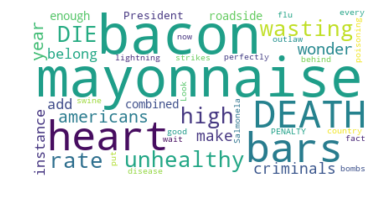

In [379]:
#WORD CLOUD
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br"])


# Start with helpful review:
ID = leastHelpful.Id
# print(ID - 1)
text = reviews.Text[470626]
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, let's combine all 5 star reviews and all 1 star reviews and compare

In [388]:
fiveStarText = " ".join(review for review in reviews[reviews['Score'] == 5.0].Text)
print ("There are {} words in the combination of 5-star reviews.".format(len(fiveStarText)))

There are 146002720 words in the combination of 5-star reviews.


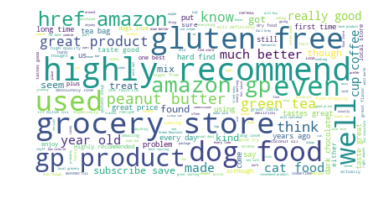

In [394]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(fiveStarText)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [392]:
oneStarText = " ".join(review for review in reviews[reviews['Score'] == 1.0].Text)
print ("There are {} words in the combination of 1-star reviews.".format(len(oneStarText)))

There are 24178833 words in the combination of 1-star reviews.


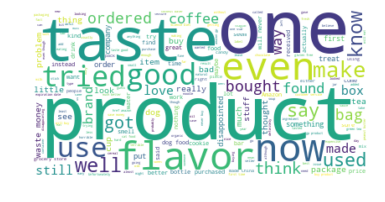

In [395]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(oneStarText)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()